Importaciones Actividad 1

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Carga de datasets

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# Normalizar valores entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Visualizar algunas imágenes

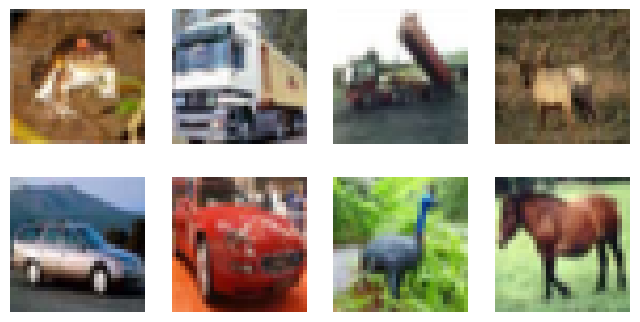

In [5]:
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

Construir la CNN

In [6]:
model = models.Sequential([
    # Capa convolucional 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # Capa convolucional 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Capa convolucional 3
    layers.Conv2D(64, (3,3), activation='relu'),

    # Aplanar
    layers.Flatten(),

    # Capa densa
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 clases
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilar el modelo

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Entrenar la CNN

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 54ms/step - accuracy: 0.3576 - loss: 1.7422 - val_accuracy: 0.5632 - val_loss: 1.2238
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 50ms/step - accuracy: 0.5841 - loss: 1.1762 - val_accuracy: 0.6262 - val_loss: 1.0650
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.6450 - loss: 1.0038 - val_accuracy: 0.6484 - val_loss: 1.0032
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.6891 - loss: 0.8878 - val_accuracy: 0.6732 - val_loss: 0.9451
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.7087 - loss: 0.8300 - val_accuracy: 0.6746 - val_loss: 0.9418
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.7315 - loss: 0.7709 - val_accuracy: 0.6909 - val_loss: 0.9040
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.7474 - loss: 0.7244 - val_accuracy: 0.6998 - val_loss: 0.8942
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.7658 

Visualizar resultados (loss y accuracy)

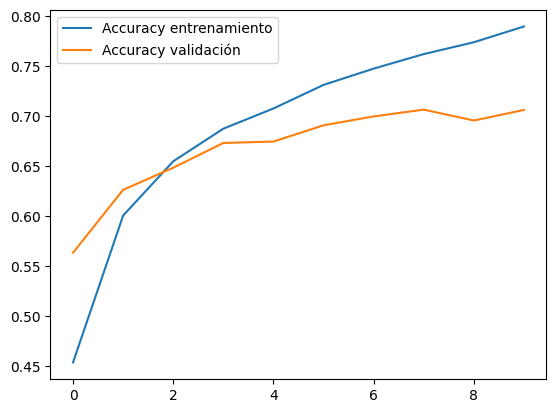

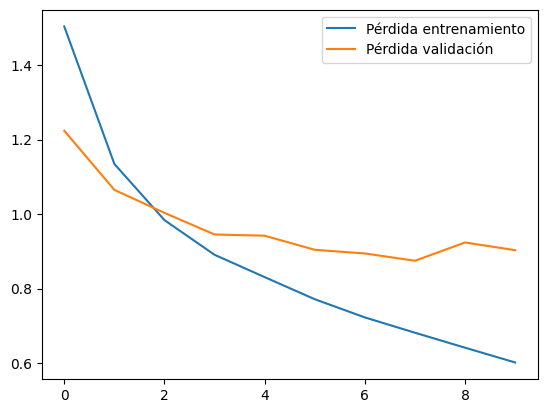

In [9]:
plt.plot(history.history['accuracy'], label='Accuracy entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy validación')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.legend()
plt.show()

Evaluar el modelo

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy en prueba:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7089 - loss: 0.8957
Accuracy en prueba: 0.7063000202178955


Realizar una predicción

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Clase predicha: 3


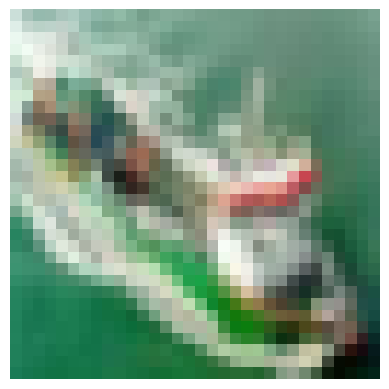

In [11]:
idx = 15
img = x_test[idx]
plt.imshow(img)
plt.axis('off')
prediction = model.predict(img.reshape(1,32,32,3))
print("Clase predicha:", np.argmax(prediction))

ACTIVIDAD 2

Importaciones Actividad 2

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Cargar el dataset MNIST

In [13]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Ajustar dimensiones para CNN (28x28x1)
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Normalizar
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualizar algunas imágenes

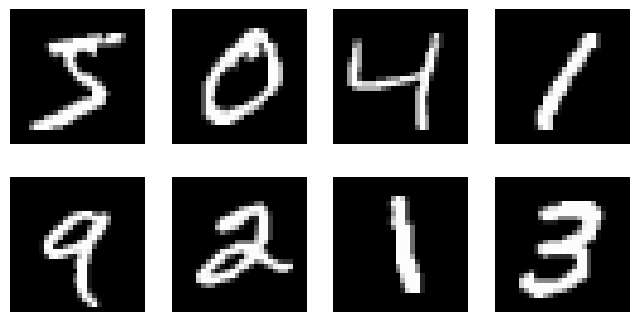

In [14]:
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.show()

Construir la CNN

In [15]:
model = models.Sequential([
    # Convolución 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    # Convolución 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    # Aplanar
    layers.Flatten(),
    # Capa densa
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 dígitos
])

Compilar el modelo

In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Entrenamiento de la CNN

In [17]:
history = model.fit(
    x_train, y_train,
    epochs=8,
    validation_data=(x_test, y_test)
)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - accuracy: 0.9089 - loss: 0.2856 - val_accuracy: 0.9853 - val_loss: 0.0441
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9862 - loss: 0.0440 - val_accuracy: 0.9904 - val_loss: 0.0287
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9899 - loss: 0.0300 - val_accuracy: 0.9886 - val_loss: 0.0335
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9935 - loss: 0.0202 - val_accuracy: 0.9912 - val_loss: 0.0286
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9951 - loss: 0.0143 - val_accuracy: 0.9906 - val_loss: 0.0314
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9964 - loss: 0.0099 - val_accuracy: 0.9897 - val_loss: 0.0364
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.9969 - loss: 0.0087 - val_accuracy: 0.9900 - val_loss: 0.0321
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9982 - loss: 0

Graficar accuracy

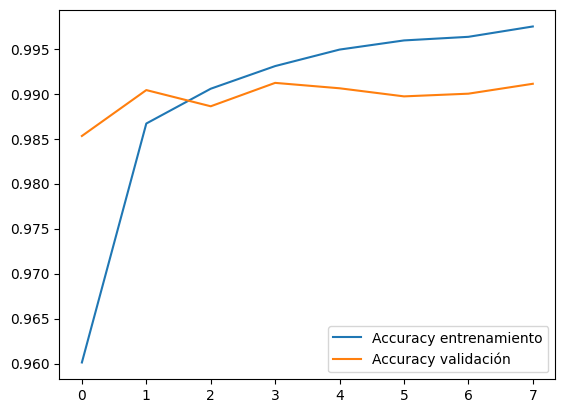

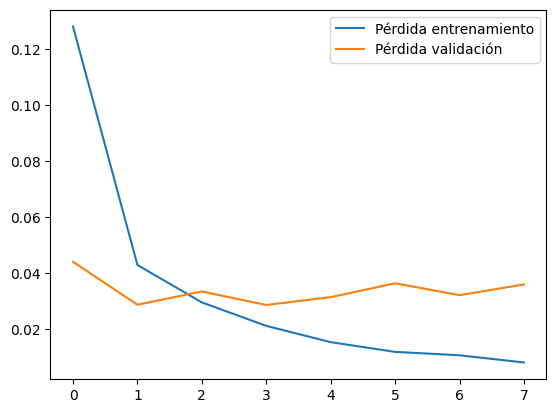

In [18]:
plt.plot(history.history['accuracy'], label='Accuracy entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy validación')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.legend()
plt.show()

Evaluar el modelo

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy en pruebas:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9876 - loss: 0.0509
Accuracy en pruebas: 0.991100013256073


Predicción de un dígito

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Clase predicha: 0


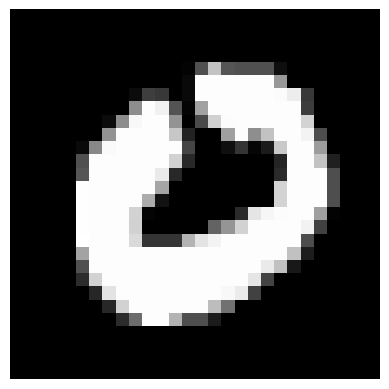

In [20]:
idx = 25
img = x_test[idx]
plt.imshow(img.reshape(28,28), cmap='gray')
plt.axis('off')
prediction = model.predict(img.reshape(1,28,28,1))
print("Clase predicha:", np.argmax(prediction))